## Shell Contact Example

In [1]:
# !pip install debugpy

In [2]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.005,
                          shell_h=0.005)

material = dismech.Material(density=1200,
                            youngs_rod=0,
                            youngs_shell=2e6,
                            poisson_rod=0,
                            poisson_shell=0.5)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=True,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=100,
                                  total_time=5,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
# env.add_force('selfContact', delta=0.01*2*5e-3, h=5e-3)
env.add_force('selfContact', delta=1e-4, h=1e-3, kc=1)
env.add_force('damping', eta=0.1)
#env.set_static()  

geo = dismech.Geometry.from_txt('input hemisphere more dense.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)

fixed_point = np.array(np.where(
    robot.state.q[robot.node_dof_indices].reshape(-1, 3)[:, 2] >= 0.99)[0])
robot = robot.fix_nodes(fixed_point)

print(fixed_point)
# u = robot.state.u
# u[11] = -0.5
# u[14] = -0.5
# u[17] = -0.5

[35]


In [3]:
print("# nodes: ", np.shape(robot.nodes))
print("# faces: ", np.shape(robot.face_nodes_shell))

# nodes:  (105, 3)
# faces:  (176, 3)


### Time Stepping

In [4]:
stepper = dismech.ImplicitEulerTimeStepper(robot)



delta: 0.1
h: 1.0
K1: 150.0
scale:  1000.0
kc:  1
upper limit for quadratic: 1.9
upper limit for smooth: 2.1


In [5]:
robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

35.63463457040206
0.04675618141126842
current_time:  0.01
71.00265226658125
0.18901083598012033
current_time:  0.02
106.02286867561035
0.42549638389441474
current_time:  0.03
140.5898216900996
0.7434589663969202
current_time:  0.04
174.5259686062992
1.1118226434926373
current_time:  0.05
207.55763689905734
1.4712511186632444
current_time:  0.06
239.31847865653415
1.721902748298922
current_time:  0.07
269.37634592646407
1.726866343356061
current_time:  0.08
297.2759466091679
1.3999089004423115
current_time:  0.09
322.5629933628688
1.1230825088318508
current_time:  0.1
344.75741419165934
1.7990450582578754
current_time:  0.11
363.31656859799176
2.727698157334283
current_time:  0.12
377.69205073809803
3.254995561041601
current_time:  0.13
387.4993677049556
3.7432120887464593
current_time:  0.14
392.7225922014091
5.6593698588189385
current_time:  0.15
393.9140523255032
12.436350630348741
0.10357865733400085
current_time:  0.16
391.29845031828427
23.508266436009364
0.4804088954670975
curren

In [9]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Shell contact p2p', plot_step=5)

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

500


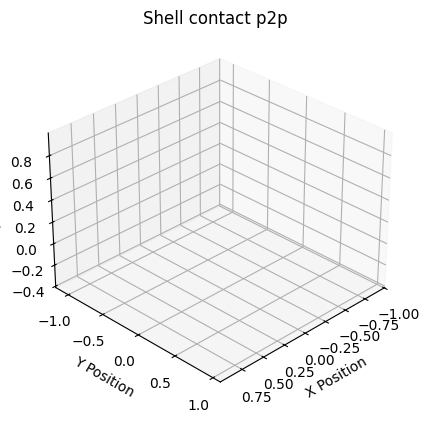

In [7]:
ani = dismech.get_animation(robot, t, qs, options)
ani.save('shell_hemisphere_self_contact.gif')